In [3]:
pip install tensorflow

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


# TensorBoardに関して

In [4]:
# ログディレクトリを削除する

import shutil
import tensorflow as tf
import os

if os.path.exists('my_log_dir'):
    shutil.rmtree('my_log_dir')

In [ ]:
# tensorboardを起動する

tensorboard --logdir=/full_path_to_your_logs
#フォルダ名を日本語にしているとエラーがおきるため必ず英語で書くように

# 実験参加者別

# クロスバリデーションあり

In [41]:
import pandas as pd
import numpy as np

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# 静止状態
df = pd.read_csv('RUD_K_okada2.csv')
df = df.sample(frac=1, random_state=0)
X_train = df.iloc[:,:6]
y_train = df.iloc[:,6]

#クロスバリデーション
FOLD = 5
kf = KFold(n_splits=FOLD, shuffle=True, random_state=0)
scores = []

#ハイパラチューニング結果のパラメータ
n_hidden = 
n_neurons = [12, 5, 7, 1, 18, 10, 10, 1, 8]
n_drop = []
optimizer = ''
batch_size = 

#ニューラルネットワークモデル構築
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(6,)))
for layer in range(n_hidden):
    model.add(layers.Dense(n_neurons[layer], activation='relu'))
    model.add(layers.Dropout(n_drop[layer]))
    #print(args['nneurons'][layer],args['ndrop'][layer])
model.add(layers.Dense(1, activation='linear'))
  
model.summary()

model.compile(optimizer=optimizer, # 最適化するためのアルゴリズム
             loss='mse', # 損失関数
             metrics='mae') # 評価関数)

callbacks = [EarlyStopping(monitor = 'val_mae', patience = 20)]

for train_index, test_index, in kf.split(X_train):
    X_train, X_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    #print(y_train)
    #print(y_test)
    
    history = model.fit(x=X_train, #入力データ
                    y=y_train,# 教師データ
                    epochs=2000, # 何回学習を行うか
                    batch_size=batch_size, # 一回に何個データを入れるか
                    verbose=0,# 学習の様子を可視化するか
                    callbacks=callbacks,
                    validation_split=0.1) # 検証用のデータ
    
    #model.save('model_D8_rud.h5')
    
    score = model.evaluate(X_test, y_test)
    scores.append(score)
    print(score)
    
    df = pd.read_csv('RUD_K_okada2.csv')
    df = df.sample(frac=1, random_state=0)
    X_train = df.iloc[:,:6]
    y_train = df.iloc[:,6]
    
print('平均スコア',np.mean(scores))

SyntaxError: invalid syntax (<ipython-input-41-f46fce915bf3>, line 24)

In [42]:
predictions = model.predict(X_test).flatten()
print(predictions)

1/1 [==============================] - 0s 26ms/step
[3.3744752 3.4834847 4.487188  3.372887  3.4678414 2.9291286 3.0373223
 4.354764  3.5388649 3.8677416 3.2654462 4.0799913 6.116349  3.83542
 3.2523282 3.4590409 3.128366  3.372899  3.8448842 3.3006833 3.7697418
 4.1971602 3.7808447 2.6140726]


In [8]:
print(y_test)

70     12.238957
100     8.692873
17     20.392915
203    19.994988
69      7.357886
138    12.525198
229     7.792147
105    12.988198
80      6.108904
91      7.430363
49      4.841469
224     6.039908
134    10.180727
141    12.207931
132    11.465092
90      8.148653
26      5.773383
211    16.534020
161     4.546637
130    10.531261
28      3.610981
191     9.687377
199    10.220247
207    12.533123
Name: Var7, dtype: float64


# 最終結果（train:test=9:1）

In [171]:
import pandas as pd
import numpy as np
import keras

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import TensorBoard

# 静止状態
df = pd.read_csv('RUD_K_okada2_test3.csv')
df = df.sample(frac=1, random_state=0)
X_train = df.iloc[:,:4]
y_train = df.iloc[:,4]
#y_mean = np.mean(y_train)
#y_std = np.std(y_train)
#y_train = (y_train - y_mean)/y_std
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state=0)

#ハイパラチューニング結果のパラメータ
n_hidden = 1
n_neurons = [20, 8, 6, 7, 1, 5, 6, 1, 8]
n_drop = [ 0.3, 0.4032712, 0.40289095, 0.34169084, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.5]
optimizer = 'Adam'
batch_size = 8

#ニューラルネットワークモデル構築
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(4,)))
for layer in range(n_hidden):
    model.add(layers.Dense(n_neurons[layer], activation='relu'))
    #leaky_relu
    model.add(layers.Dropout(n_drop[layer]))
    #print(args['nneurons'][layer],args['ndrop'][layer])
model.add(layers.Dense(1, activation='linear'))

model.summary()

model.compile(optimizer=optimizer, # 最適化するためのアルゴリズム
              #keras.optimizers.RMSprop(learning_rate=0.000001)
             loss='mse', # 損失関数
             metrics='mae') # 評価関数)

callbacks = [
    EarlyStopping(monitor = 'val_mae', patience = 20),
    #TensorBoard(log_dir='C:/Users/Naoya/Master_thesis/my_log_dir', histogram_freq=1, embeddings_freq=1)
]


history = model.fit(x=X_train, #入力データ
                    y=y_train,# 教師データ
                    epochs=1000, # 何回学習を行うか
                    batch_size=batch_size, # 一回に何個データを入れるか
                    verbose=1,# 学習の様子を可視化するか
                    callbacks=callbacks,
                    validation_split=0.1) # 検証用のデータ
    
#model.save('model_D8_rud.h5')

score = model.evaluate(X_test, y_test)
print("Test set loss: {}, Test set mean_squared_error: {}".format(score[0], score[1]))
#predictions = model.predict(X_test).flatten()
#print(predictions)

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 20)                100       
                                                                 
 dropout_105 (Dropout)       (None, 20)                0         
                                                                 
 dense_156 (Dense)           (None, 1)                 21        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
25/25 [==============================] - 1s 9ms/step - loss: 3487.3169 - mae: 55.6127 - val_loss: 3959.7983 - val_mae: 59.0008
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 3461.2603 - mae: 55.3827 - val_loss: 3932.9197 - val_mae: 58.7718
Epoch 3/1000
25/25 [===================

25/25 [==============================] - 0s 3ms/step - loss: 884.9072 - mae: 24.1439 - val_loss: 1075.4956 - val_mae: 26.5187
Epoch 54/1000
25/25 [==============================] - 0s 3ms/step - loss: 869.2525 - mae: 24.3315 - val_loss: 1042.4259 - val_mae: 26.1820
Epoch 55/1000
25/25 [==============================] - 0s 3ms/step - loss: 834.1683 - mae: 22.9868 - val_loss: 1010.8969 - val_mae: 25.8583
Epoch 56/1000
25/25 [==============================] - 0s 3ms/step - loss: 757.0400 - mae: 21.8890 - val_loss: 983.8121 - val_mae: 25.5616
Epoch 57/1000
25/25 [==============================] - 0s 3ms/step - loss: 811.8826 - mae: 22.9892 - val_loss: 959.1633 - val_mae: 25.2888
Epoch 58/1000
25/25 [==============================] - 0s 3ms/step - loss: 759.0303 - mae: 22.7448 - val_loss: 932.2247 - val_mae: 24.9790
Epoch 59/1000
25/25 [==============================] - 0s 3ms/step - loss: 775.1931 - mae: 22.6507 - val_loss: 906.9393 - val_mae: 24.6686
Epoch 60/1000
25/25 [=================

Epoch 112/1000
25/25 [==============================] - 0s 3ms/step - loss: 559.3713 - mae: 20.1302 - val_loss: 597.8694 - val_mae: 20.6498
Epoch 113/1000
25/25 [==============================] - 0s 3ms/step - loss: 562.1315 - mae: 19.5410 - val_loss: 598.5385 - val_mae: 20.6574
Epoch 114/1000
25/25 [==============================] - 0s 3ms/step - loss: 581.3224 - mae: 20.7378 - val_loss: 595.4505 - val_mae: 20.6104
Epoch 115/1000
25/25 [==============================] - 0s 3ms/step - loss: 580.9258 - mae: 20.1956 - val_loss: 589.7471 - val_mae: 20.5134
Epoch 116/1000
25/25 [==============================] - 0s 3ms/step - loss: 562.3113 - mae: 19.6713 - val_loss: 590.4496 - val_mae: 20.5272
Epoch 117/1000
25/25 [==============================] - 0s 3ms/step - loss: 563.8937 - mae: 20.1941 - val_loss: 590.7708 - val_mae: 20.5487
Epoch 118/1000
25/25 [==============================] - 0s 3ms/step - loss: 566.7830 - mae: 19.5796 - val_loss: 588.0289 - val_mae: 20.5206
Epoch 119/1000
25/25

In [172]:
predictions = model.predict(X_test).flatten()
print(predictions)

1/1 [==============================] - 0s 57ms/step
[53.461273 57.025238 51.89733  43.540924 53.04459  56.261932 40.778244
 60.60865  44.58862  49.79255  52.37589  57.21271  48.64221  46.495773
 51.12316  48.0876   59.208473 53.557243 47.555267 57.585392 52.30129
 46.977318 53.556427 49.98197 ]


In [139]:
l3 = model.layers[0]
print(l3.get_weights()[1])

#l3 = model.layers[0].get_weights()[0]) 0層の重み
#l3 = model.layers[0].get_weights()[1]) 0層のバイアス
#0 2 4 6 8

[nan nan nan nan nan nan nan]


In [ ]:
-0.644225117	-0.274712335	-0.129284778	0.775207263	0.017656212	0.419095587	0.000171071


In [32]:
print(y_test)

133    0.112374
68     0.069213
50     0.140125
162    0.093135
73     0.087628
70     0.101279
186    0.094304
165    0.098804
7      0.101957
221    0.128838
59     0.132260
17     0.084223
174    0.077594
168    0.129930
105    0.106900
84     0.103542
164    0.096654
20     0.096986
28     0.132762
45     0.157615
157    0.071098
124    0.113308
201    0.090180
226    0.131144
Name: Var7, dtype: float64


# 推定値と実測値のグラフ

Text(0, 0.5, 'Y_Angle')

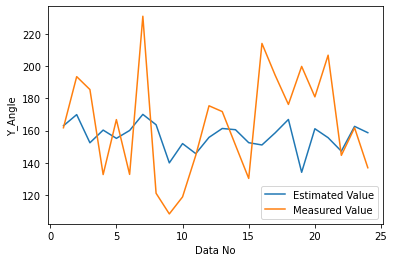

In [164]:
import matplotlib.pyplot as plt

X = []
for i in range(np.size(y_test)):
    X.append(i+1)
pred = np.array(predictions)
test = np.array(y_test)

plt.figure()
plt.plot(X,pred,X,test)
plt.legend(["Estimated Value", "Measured Value"])
plt.xlabel("Data No")
plt.ylabel("Y_Angle")

Text(0, 0.5, 'X_Angle')

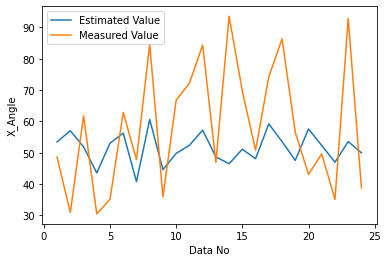

In [174]:
import matplotlib.pyplot as plt

X = []
for i in range(np.size(y_test)):
    X.append(i+1)
pred = np.array(predictions)
test = np.array(y_test)

plt.figure()
plt.plot(X,pred,X,test)
plt.legend(["Estimated Value", "Measured Value"])
plt.xlabel("Data No")
plt.ylabel("X_Angle")

Text(0, 0.5, 'Stiffness')

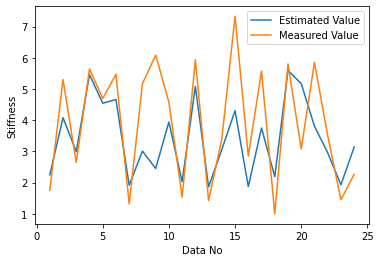

In [72]:
import matplotlib.pyplot as plt

X = []
for i in range(np.size(y_test)):
    X.append(i+1)
pred = np.array(predictions)
test = np.array(y_test)

plt.figure()
plt.plot(X,pred,X,test)
plt.legend(["Estimated Value", "Measured Value"])
plt.xlabel("Data No")
plt.ylabel("Stiffness")

Text(0, 0.5, 'Stiffness')

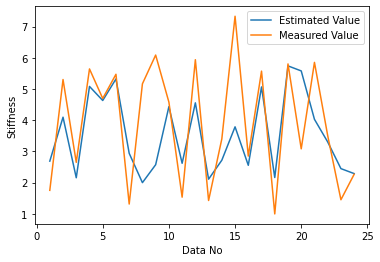

In [51]:
import matplotlib.pyplot as plt

X = []
for i in range(np.size(y_test)):
    X.append(i+1)
pred = np.array(predictions)
test = np.array(y_test)

plt.figure()
plt.plot(X,pred,X,test)
plt.legend(["Estimated Value", "Measured Value"])
plt.xlabel("Data No")
plt.ylabel("Stiffness")

Text(0, 0.5, 'Stiffness')

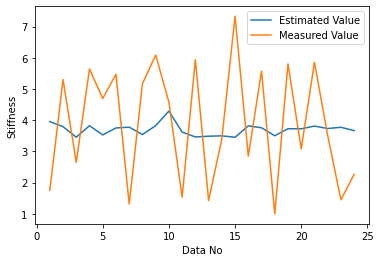

In [31]:
import matplotlib.pyplot as plt

X = []
for i in range(np.size(y_test)):
    X.append(i+1)
pred = np.array(predictions)
test = np.array(y_test)

plt.figure()
plt.plot(X,pred,X,test)
plt.legend(["Estimated Value", "Measured Value"])
plt.xlabel("Data No")
plt.ylabel("Stiffness")

Text(0, 0.5, 'Stiffness')

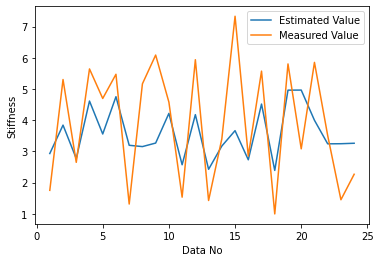

In [17]:
import matplotlib.pyplot as plt

X = []
for i in range(np.size(y_test)):
    X.append(i+1)
pred = np.array(predictions)
test = np.array(y_test)

plt.figure()
plt.plot(X,pred,X,test)
plt.legend(["Estimated Value", "Measured Value"])
plt.xlabel("Data No")
plt.ylabel("Stiffness")

# 過学習の確認

In [129]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

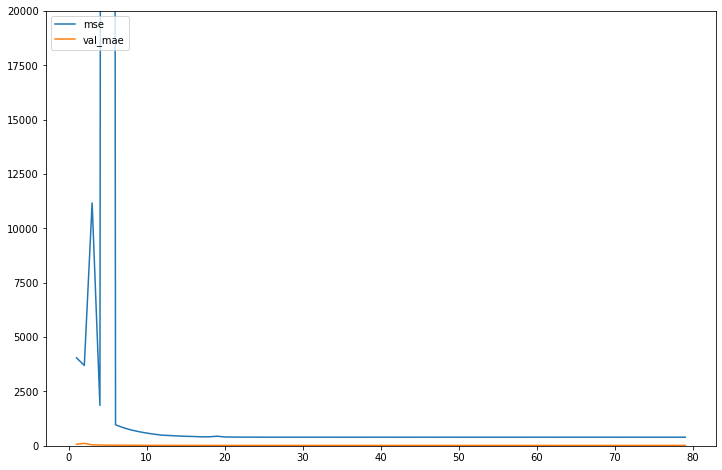

In [130]:
import matplotlib.pyplot as plt

mse = history_dict['loss']              #訓練用データに対するmse
val_mse = history_dict['val_mae']      #検証用データに対するmse
epocha = range(1, len(mse) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epocha, mse, label = 'mse')
plt.plot(epocha, val_mse, label = 'val_mae')
plt.ylim((0, 20000))
plt.legend(loc = 'upper left')
plt.show()

# 弾性

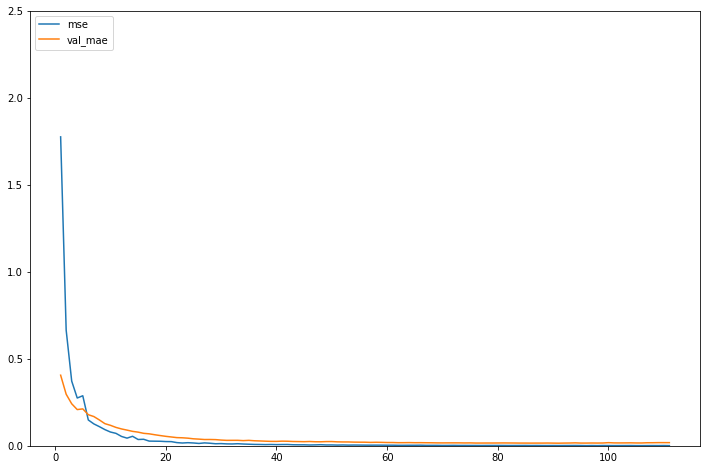

In [123]:
import matplotlib.pyplot as plt

mse = history_dict['loss']              #訓練用データに対するmse
val_mse = history_dict['val_mae']      #検証用データに対するmse
epocha = range(1, len(mse) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epocha, mse, label = 'mse')
plt.plot(epocha, val_mse, label = 'val_mae')
plt.ylim((0, 2.5))
plt.legend(loc = 'upper left')
plt.show()

# 粘性

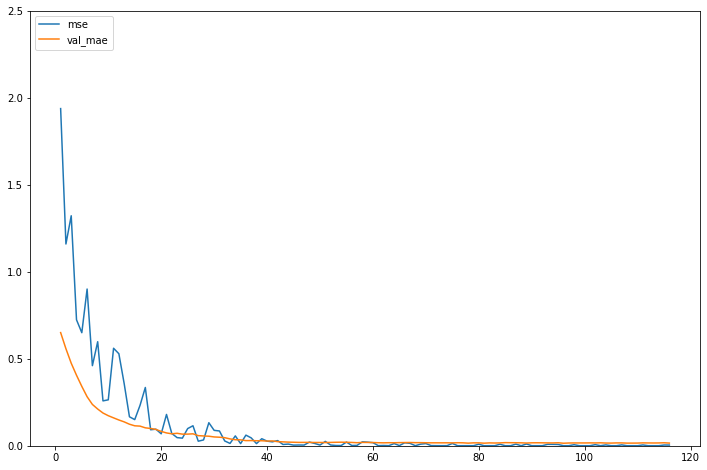

In [119]:
import matplotlib.pyplot as plt

mse = history_dict['loss']              #訓練用データに対するmse
val_mse = history_dict['val_mae']      #検証用データに対するmse
epocha = range(1, len(mse) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epocha, mse, label = 'mse')
plt.plot(epocha, val_mse, label = 'val_mae')
plt.ylim((0, 2.5))
plt.legend(loc = 'upper left')
plt.show()

# 慣性

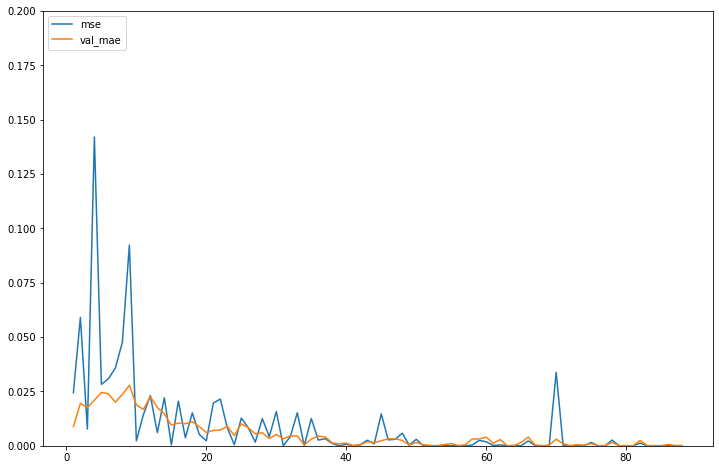

In [177]:
import matplotlib.pyplot as plt

mse = history_dict['loss']              #訓練用データに対するmse
val_mse = history_dict['val_mae']      #検証用データに対するmse
epocha = range(1, len(mse) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epocha, mse, label = 'mse')
plt.plot(epocha, val_mse, label = 'val_mae')
plt.ylim((0, 0.2))
plt.legend(loc = 'upper left')
plt.show()

# 固くなっているか、柔らくなっているかだけの正解率
（数値レベルではなく、関節を固くしているか、それとも柔らかくしているかを判定できているかの指標）

In [32]:
cnt = 0
y_test_move = []
y_pred_move = []

for i in range(np.size(y_test)-1):
    y_test_move.append(test[i+1] - test[i])
    y_pred_move.append(pred[i+1] - pred[i])
    
    if y_test_move[i] > 0 and y_pred_move[i] > 0:
        cnt = cnt + 1
    elif y_test_move[i] < 0 and y_pred_move[i] < 0:
        cnt = cnt + 1
    else:
        cnt = cnt
    
res = (cnt/np.size(y_test_move)) * 100
print(res)

60.86956521739131


# 評価指標 VAF
基本的には決定係数と概念は同じ。決定係数は回帰分析に特に使われる用語であり、VAFは統計的解析全般で使用されるより広い概念

In [27]:
import numpy as np
#pred1 = np.array([6.6786265, 12.214588,  8.851692,  14.439358])
#ytest = np.array([7.357886, 12.525198, 7.792147, 12.988198])
VAF = 1 - (sum(np.square(predictions - y_test))/sum(np.square(y_test)))
VAF

0.9495310429487398

In [23]:
np.mean(VAF)

0.9655188440213915

# 評価指標 決定係数
説明変数がどれだけ目的変数の値を説明しているか

In [28]:
import numpy as np
from sklearn.metrics import r2_score

r2_score(y_test, predictions)

-0.18586248248544468

# 正規化した教師データを元に戻す

In [42]:
y_test = y_test * y_std + y_mean
y_pred = np.array([ 0.14598463,  0.3419058,   0.1490927,   0.2630759,  -0.4524271,   0.5083408,
  0.0752378,   0.7207463,  -0.14900841,  0.40626577,  0.01099011,  0.27077213,
  0.11981243,  0.5750668,   0.14347285,  0.48047435, -0.7004475,   0.494358,
 -0.45683002,  0.60833395, -0.85911584,  0.26755455,  0.3226298,   0.3938045 ])
y_pred1 = y_pred * y_std + y_mean

# GP-EIとTPEの精度の差の検証

In [32]:
MSE_value_GPEI = [12.9721, 13.2467, 11.7362, 11.0350, 13.3048]
res_GPEI = np.sqrt(np.mean(MSE_value_GPEI))
print(res_GPEI)

3.5297252017685454


In [22]:
MSE_value_tpe = [14.7603, 13.1443, 13.2785, 13.0241, 13.7724]
res_tpe = np.sqrt(np.mean(MSE_value_tpe))
print(res_tpe)

3.687264568755543


# 実験参加者共有

# クロスバリデーションなし

In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 静止状態
df = pd.read_csv('KCB2.csv')
df = df.sample(frac=1, random_state=0)
df2 = pd.read_csv('okada_K2.csv')
df2 = df2.sample(frac=1, random_state=0)

X_train = df.iloc[:,:6]
y_train = df.iloc[:,6]

X_test = df2.iloc[:,:6]
y_test = df2.iloc[:,6]

#ハイパラチューニング結果のパラメータ
n_hidden = 
n_neurons = [12, 5, 7, 1, 18, 10, 10, 1, 8]
n_drop = []
optimizer = ''
batch_size = 

#ニューラルネットワークモデル構築
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(6,)))
for layer in range(n_hidden):
    model.add(layers.Dense(n_neurons[layer], activation='relu'))
    model.add(layers.Dropout(n_drop[layer]))
    #print(args['nneurons'][layer],args['ndrop'][layer])
model.add(layers.Dense(1, activation='linear'))

model.summary()

model.compile(optimizer=optimizer, # 最適化するためのアルゴリズム
             loss='mse', # 損失関数
             metrics='mae') # 評価関数)

callbacks = [
    EarlyStopping(monitor = 'val_mae', patience = 20),
    #TensorBoard(log_dir='C:/Users/Naoya/Master_thesis/my_log_dir', histogram_freq=1, embeddings_freq=1)
]



history = model.fit(x=X_train, #入力データ
                    y=y_train,# 教師データ
                    epochs=2000, # 何回学習を行うか
                    batch_size=batch_size, # 一回に何個データを入れるか
                    verbose=0,# 学習の様子を可視化するか
                    callbacks=callbacks,
                    validation_split=0.1) # 検証用のデータ
    
#model.save('model_D8_rud.h5')

score = model.evaluate(X_test, y_test)
print("Test set loss: {}, Test set mean_squared_error: {}".format(score[0], score[1]))
predictions = model.predict(X_test).flatten()
print(predictions)

8/8 [==============================] - 0s 2ms/step - loss: 23.0216 - mse: 23.0216
Test set loss: 23.0216064453125, Test set mean_squared_error: 23.0216064453125
8/8 [==============================] - 0s 2ms/step
[10.559817   9.360161  10.681282   6.526148   7.574006   7.5043645
  7.307035   7.598063   9.289429   7.591017   7.665736   5.0418773
  5.305903   6.9419017  5.100556   9.623416  11.335661  14.860056
  9.728609   6.3017955  8.981484   6.889204   4.748606   9.227712
  7.2925816 11.630365   8.892137   5.474504   8.942367  14.298007
  7.3382773  6.5507407  7.6398497 13.62886    8.8388815  6.1347675
  6.685852   3.4424496  7.698624   6.662327   8.369465   9.1141615
  6.7006598  6.0805645  7.545266  10.928009   5.8232646  9.245184
  9.988102   5.4183435  6.3088813  7.6922836  8.258295   5.690563
 10.601068   6.089298   6.505362   5.996051   7.6434784  6.969148
  7.281486   6.336153   8.531144   7.3827305  4.17994    6.005849
 10.055817   7.7314177  6.759003   7.4444413  9.832714  11

In [6]:
y_test[0:24]

218     5.082520
143    13.064120
171     6.518885
187     8.807514
136    13.991357
130    10.531261
146    12.292600
168    15.031839
90      8.148653
156    10.876105
137    13.264666
124     7.527795
110    10.268566
116     4.301829
169    11.703271
8      15.416601
71      8.190447
222    13.390717
111    15.736445
5      11.156106
179     4.352810
44      7.903462
170    15.893529
96     21.364986
Name: Var7, dtype: float64

# 重み

In [35]:
l3 = model.layers[0]
print(l3.get_weights()[0])

[[-0.08678544  0.33274642 -0.4085083   0.3938711   0.29682055  0.28584123
   0.6089735  -0.27949342 -0.30281374 -0.21877007]
 [-0.11953892 -0.3089915  -0.19113913 -0.52567863 -0.20261976 -0.23321372
   0.3401562   0.60777247 -0.18737166  0.08242722]
 [-0.49168175  0.28736556  0.1430176  -0.25752434 -0.51612127  0.27655414
  -0.5732524   0.05660985 -0.29742798  0.11937274]
 [-0.46014398  0.13754117  0.05870016  0.33086973  0.03679021  0.19998987
   0.4599845   0.09953152 -0.01601405  0.02532058]
 [ 0.35742    -0.35505044  0.4772657  -0.04149948  0.39666817  0.43520418
   0.00345245  0.31146315  0.26447034  0.5339595 ]
 [ 0.27551842 -0.09310336  0.09135342 -0.1315514  -0.6251928   0.19884491
  -0.24663748 -0.5951349  -0.10373007  0.6033406 ]]


# Oeraring State

In [9]:
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras.models import load_model

df2 = pd.read_csv('Jag_rud_K_real.csv')

X_test = df2.iloc[:, :6]
y_test = df2.iloc[:,6]

model = load_model('model_D8_rud.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 3         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [10]:
predictions = model.predict(X_test).flatten()
print(predictions)

[4.579752  5.2046256 7.287089  8.844046  7.547865  7.0147014 6.8690352
 7.5483265 5.08073   7.6728168]


# 過学習の確認

In [97]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

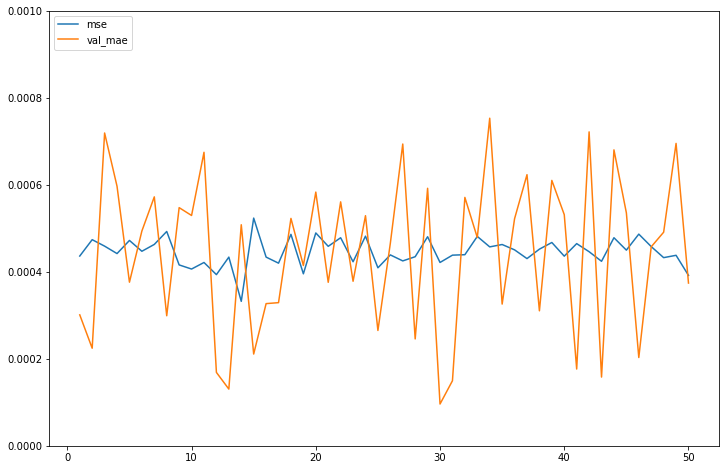

In [105]:
import matplotlib.pyplot as plt

mse = history_dict['mae']              #訓練用データに対するmse
val_mse = history_dict['val_mae']      #検証用データに対するmse
epocha = range(1, len(mse) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epocha, mse, label = 'mse')
plt.plot(epocha, val_mse, label = 'val_mae')
plt.ylim((0, 0.001))
plt.legend(loc = 'upper left')
plt.show()

In [22]:
import keras.backend as K
def root_pred(y_true, y_pred):
    return K.sqrt(y_pred)